In [181]:
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn
import datetime as dt
from pytz import timezone


df1 = pd.read_json("/Users/gm/Desktop/Spotify/MyData 2/Streaming_History_Audio_2016-2018_0.json") # Load the JSON File into a dataframe
df2 = pd.read_json("/Users/gm/Desktop/Spotify/MyData 2/Streaming_History_Audio_2018-2019_1.json")
df3 = pd.read_json("/Users/gm/Desktop/Spotify/MyData 2/Streaming_History_Audio_2019-2021_2.json")
df4 = pd.read_json("/Users/gm/Desktop/Spotify/MyData 2/Streaming_History_Audio_2021-2022_3.json")
df5 = pd.read_json("/Users/gm/Desktop/Spotify/MyData 2/Streaming_History_Audio_2022-2023_4.json")
df6 = pd.read_json("/Users/gm/Desktop/Spotify/MyData 2/Streaming_History_Audio_2023_5.json")

spotify_stream_df = pd.concat([df1,df2,df3,df4,df5,df6], ignore_index=True) # To concatenate the two dataframes

In [182]:
spotify_stream_df["Play-Time"] = pd.to_datetime(spotify_stream_df["ts"], utc=True)

# Define the Vancouver timezone
vancouver_tz = timezone('America/Vancouver')

# Convert the 'Play-Time' column from UTC to Vancouver time
spotify_stream_df["Play-Time-Vancouver"] = spotify_stream_df["Play-Time"].dt.tz_convert(vancouver_tz)



In [183]:
spotify_stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89593 entries, 0 to 89592
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype                            
---  ------                             --------------  -----                            
 0   ts                                 89593 non-null  object                           
 1   username                           89593 non-null  object                           
 2   platform                           89593 non-null  object                           
 3   ms_played                          89593 non-null  int64                            
 4   conn_country                       89593 non-null  object                           
 5   ip_addr_decrypted                  89593 non-null  object                           
 6   user_agent_decrypted               87065 non-null  object                           
 7   master_metadata_track_name         88555 non-null  object                   

In [184]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time-Vancouver"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time-Vancouver"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time-Vancouver"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time-Vancouver"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time-Vancouver"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time-Vancouver"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time-Vancouver"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1 

spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["ms_played"], unit='ms')



In [185]:
def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [186]:
spotify_stream_df.drop(columns=["ts","Time-Played (hh-mm-ss)","ms_played"], inplace=True)

In [187]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/var/folders/hx/4w9b78g15zj3qxgwfj_1p8y00000gn/T/ipykernel_80320/1738326915.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Artisit Name

Text(0.5, 1.0, 'Unique Artist Percentage')

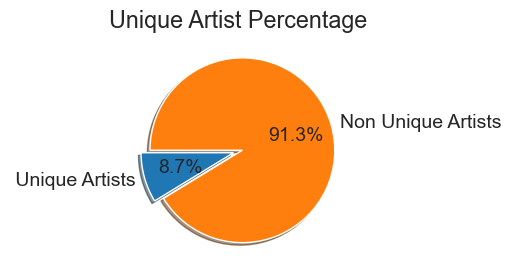

In [188]:
unique_artists = spotify_stream_df["master_metadata_album_artist_name"].nunique() # Count number of unique artist in dataset
total_artists = spotify_stream_df["master_metadata_album_artist_name"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique

unique_artist_list = np.array([unique_artists, total_artists-unique_artists]) # Make an array out of the results
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] # Make a lable for them
fig, ax = plt.subplots(figsize=(6,3))

ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True)
plt.title("Unique Artist Percentage")

Top 20 Artisits

In [189]:
top_20_artist_df = spotify_stream_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_20_artist_df.head(20)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
Kendrick Lamar,79.424,4768.705,1740
Foals,74.656,4481.564,1393
Childish Gambino,70.476,4227.996,1538
Muse,68.407,4105.389,1410
Vulfpeck,59.411,3571.844,1327
Thundercat,57.332,3445.974,1637
Queens of the Stone Age,54.693,3282.899,1021
Nothing But Thieves,51.012,3058.913,1144
Led Zeppelin,48.297,2898.612,896


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kendrick Lamar'),
  Text(1, 0, 'Foals'),
  Text(2, 0, 'Childish Gambino'),
  Text(3, 0, 'Muse'),
  Text(4, 0, 'Vulfpeck'),
  Text(5, 0, 'Thundercat'),
  Text(6, 0, 'Queens of the Stone Age'),
  Text(7, 0, 'Nothing But Thieves'),
  Text(8, 0, 'Led Zeppelin'),
  Text(9, 0, 'The Avalanches')])

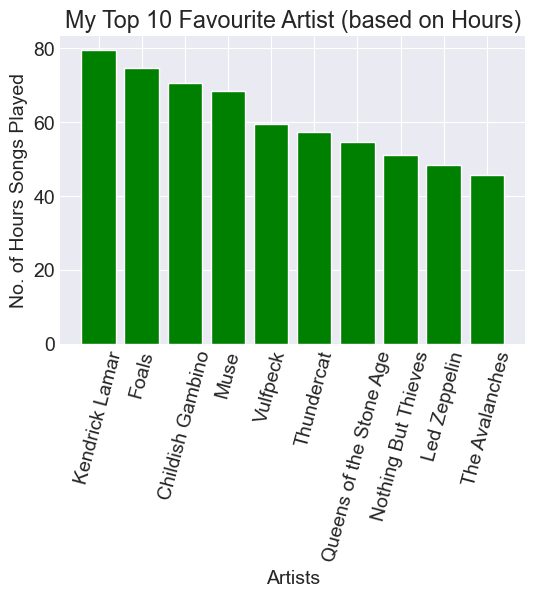

In [190]:
fig,ax = plt.subplots(figsize=(6,4))
ax.bar(top_20_artist_df.head(10).index,top_20_artist_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played")
plt.xticks(rotation=75)

Top Songs

In [191]:
top_10_songs_time_df = spotify_stream_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

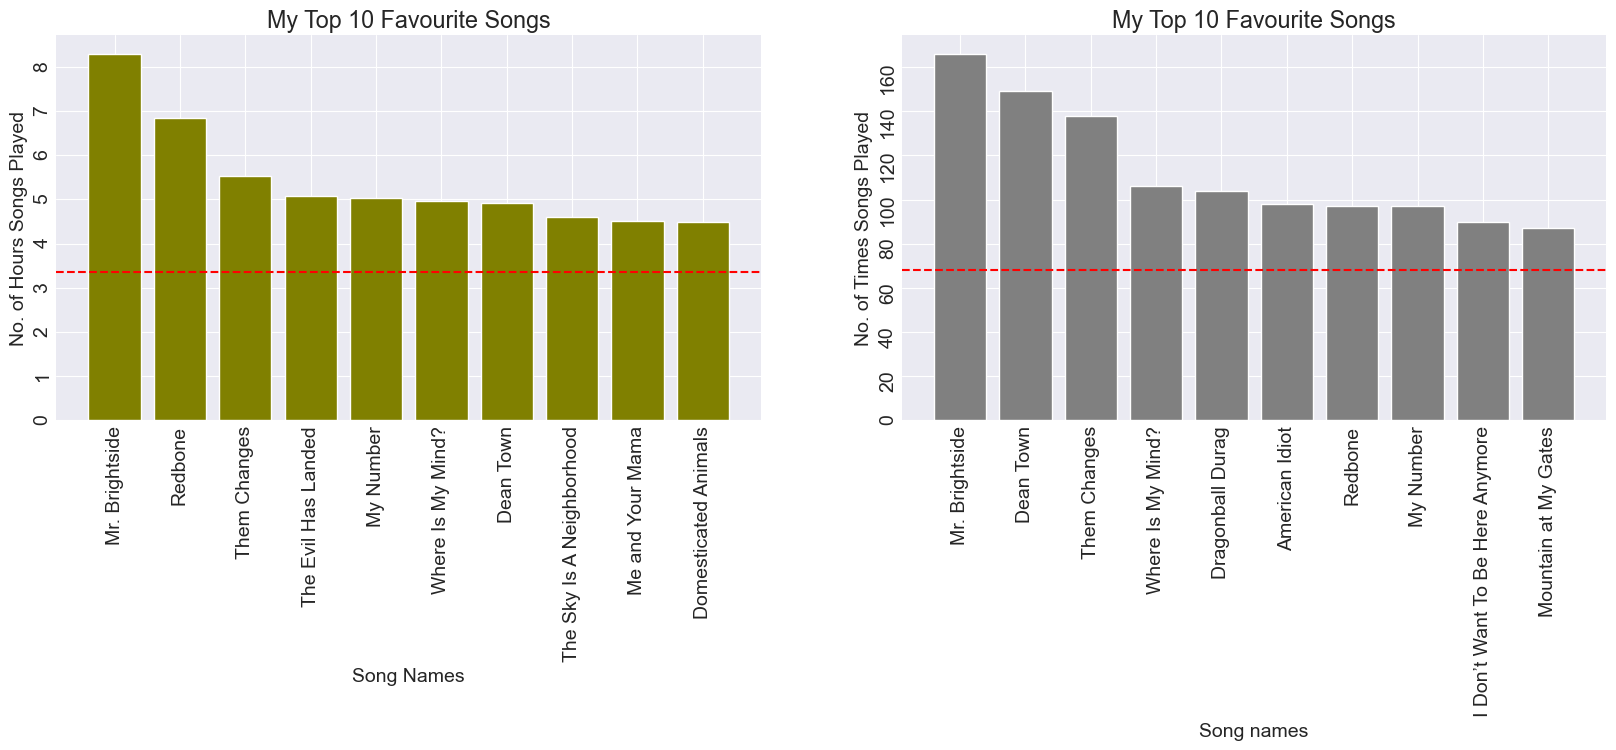

In [192]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="olive")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Song Names",ylabel="No. of Hours Songs Played")
ax1.tick_params(labelrotation=90)
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# Setting up our second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="gray")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Song names",ylabel="No. of Times Songs Played")
ax2.tick_params(labelrotation=90)
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r")

Distribution of Usage over a day

<Axes: title={'center': 'Average Distribution of Streaming Over Day Hours'}, xlabel='Hours (in 24 hour format)', ylabel='Songs Played'>

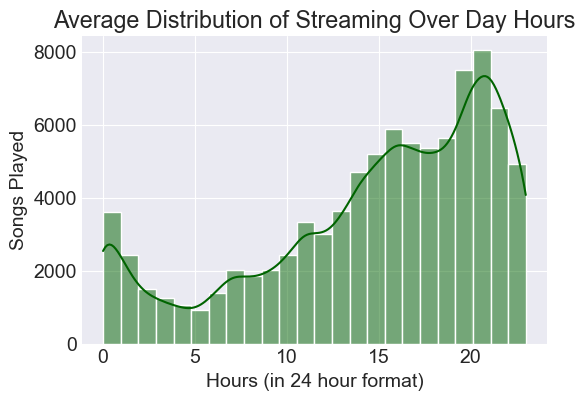

In [193]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen")

Year Distribution

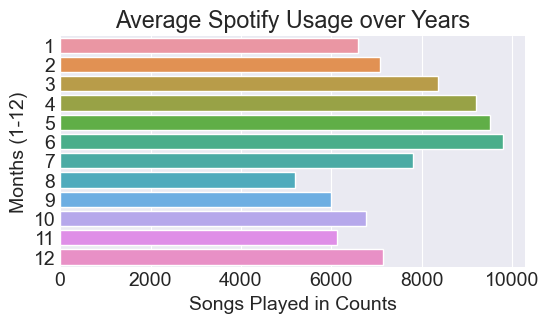

In [194]:
fig, ax = plt.subplots(figsize=(6,3))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

In [195]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum() # Summation of all 
time_spent_hours

4018.392

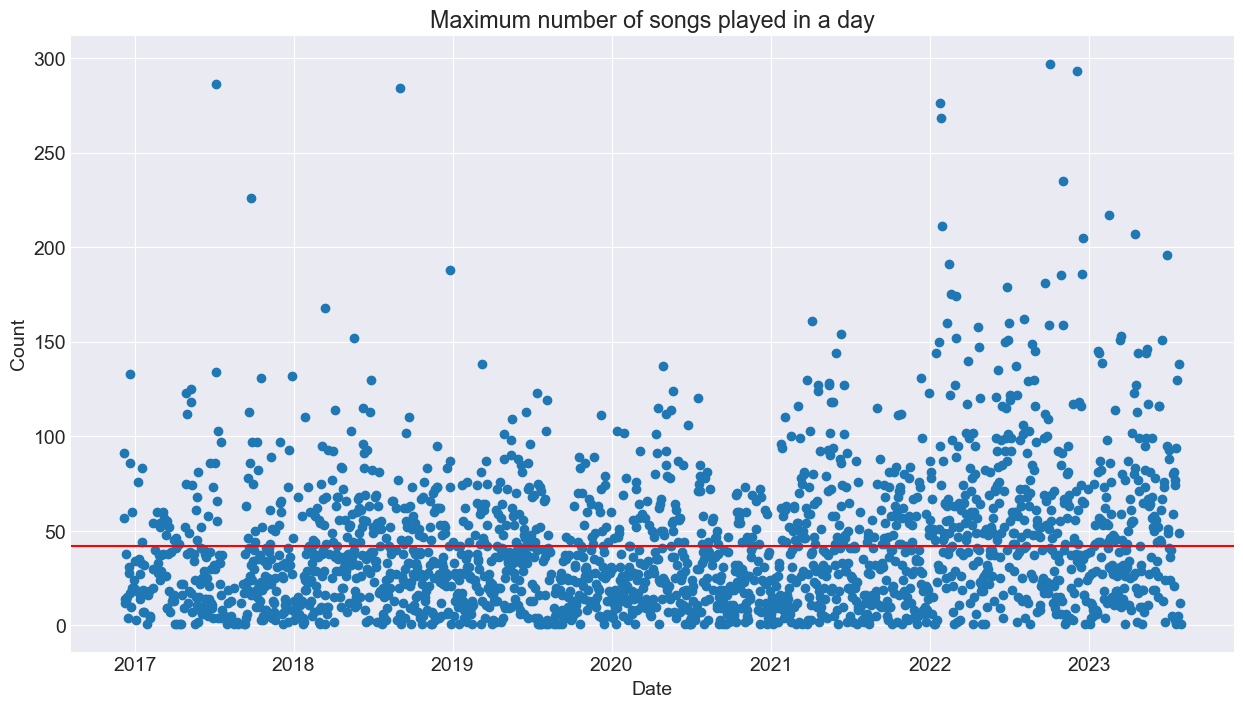

In [197]:
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date # Creating a new column with date
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

Sources:

https://jovian.com/bhupeshchandrawanshi/spotify-streaming-history-exploratory-data-analysis-project
